## 問題60

In [0]:
!rm GoogleNews-vectors-negative300.bin.gz GoogleNews-vectors-negative300.bin
!wget -q https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!gunzip -n GoogleNews-vectors-negative300.bin.gz

rm: cannot remove 'GoogleNews-vectors-negative300.bin': No such file or directory


In [0]:
!pip install gensim

In [0]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
model["United_States"]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 問題61

In [0]:
print(model.similarity('United_States','U.S.'))

0.73107743


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## 問題62

In [0]:
print(model.most_similar('United_States'))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370391845703), ('United_Sates', 0.74007248878479), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.6019070148468018)]


## 問題63

In [0]:
print(model.most_similar(positive=['Spain','Athens'],negative=['Madrid']))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Greece', 0.6898481249809265), ('Aristeidis_Grigoriadis', 0.5606848001480103), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862693786621), ('Hrysopiyi_Devetzi', 0.5248444676399231), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166866183280945), ('Iraklion', 0.5146791934967041)]


## 問題64

In [0]:
!pip install pandas

In [0]:
import re
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')
drive_root_dir="./drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
words_list=[]
with open(drive_root_dir+"/questions-words.txt","r") as f:
  text='初期値'
  for line in f.readlines():
    word=[]
    line=line.split()
    if line[0]==':':
      text=line[1]
    else:
      word.append(text)
      for elem in line:
        word.append(elem)
      words_list.append(word)
print(words_list[:1])

[['capital-common-countries', 'Athens', 'Greece', 'Baghdad', 'Iraq']]


In [0]:
for words in words_list:
  word,prob=model.most_similar(positive = [words[2],words[3]],negative = [words[1]],topn = 1)[0]
  words.append(word)
  
pd.DataFrame(words_list[:10])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,0,1,2,3,4,5
0,capital-common-countries,Athens,Greece,Baghdad,Iraq,Iraqi
1,capital-common-countries,Athens,Greece,Bangkok,Thailand,Thailand
2,capital-common-countries,Athens,Greece,Beijing,China,China
3,capital-common-countries,Athens,Greece,Berlin,Germany,Germany
4,capital-common-countries,Athens,Greece,Bern,Switzerland,Switzerland
5,capital-common-countries,Athens,Greece,Cairo,Egypt,Egypt
6,capital-common-countries,Athens,Greece,Canberra,Australia,Australia
7,capital-common-countries,Athens,Greece,Hanoi,Vietnam,Viet_Nam
8,capital-common-countries,Athens,Greece,Havana,Cuba,Cuba
9,capital-common-countries,Athens,Greece,Helsinki,Finland,Finland


## 問題65

In [0]:
with open(drive_root_dir+'/questions-words2.txt','w') as f:
  for words in words_list:
    f.write("{}\t{}\t{}\t{}\t{}\t{}\n".format(words[0],words[1],words[2],words[3],words[4],words[5]))


In [0]:
with open(drive_root_dir+'/questions-words2.txt','r') as f:
  sem_all=0
  sem_count=0
  syn_all=0
  syn_count=0
  for words in f.readlines():
    word=words.split()
    if re.match('gram',word[0]):
      syn_all+=1
      if word[4]==word[5]:
        syn_count+=1
    else:
      sem_all+=1
      if word[4]==word[5]:
        sem_count+=1

print(syn_count/syn_all)
print(sem_count/sem_all)

0.7400468384074942
0.7308602999210734


## 問題66

In [0]:
from scipy.stats import spearmanr
import csv

In [0]:
with open(drive_root_dir + '/wordsim353/combined.csv','r') as f:
  combine=f.readlines()
human=[]
machine=[]
for words in combine[1:]:
  word1,word2,similarity = words.split(',')
  human.append(similarity)
  machine.append(model.similarity(word1,word2))
correlation, pvalue = spearmanr(human, machine)
print(correlation)

0.6849564489532377


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## 問題67

In [0]:
countries=set()
with open(drive_root_dir+'/questions-words2.txt','r') as f:
  for line in f.readlines():
    words=line.split()
    if words[0] in ['capital-common-countries','capital-world']:
      countries.add(words[2])
print(countries)

{'Ireland', 'Armenia', 'Cyprus', 'Vietnam', 'Turkey', 'Mali', 'Iran', 'Liberia', 'Syria', 'Croatia', 'Oman', 'Greenland', 'Jordan', 'Australia', 'Belgium', 'Belize', 'Mauritania', 'Gabon', 'Libya', 'Uganda', 'Poland', 'Nicaragua', 'Norway', 'Latvia', 'Senegal', 'Jamaica', 'Russia', 'Namibia', 'Chile', 'Taiwan', 'Montenegro', 'Botswana', 'Madagascar', 'Kazakhstan', 'Finland', 'Egypt', 'Greece', 'Albania', 'Eritrea', 'Afghanistan', 'Angola', 'Suriname', 'Guinea', 'Denmark', 'Turkmenistan', 'England', 'Bangladesh', 'Tajikistan', 'Somalia', 'Dominica', 'Spain', 'Switzerland', 'Cuba', 'Indonesia', 'Gambia', 'Venezuela', 'Japan', 'Lebanon', 'Zambia', 'Samoa', 'Azerbaijan', 'Guyana', 'Malawi', 'Honduras', 'France', 'Ghana', 'China', 'Kenya', 'Georgia', 'Bhutan', 'Hungary', 'Ukraine', 'Burundi', 'Liechtenstein', 'Mozambique', 'Canada', 'Thailand', 'Slovakia', 'Lithuania', 'Italy', 'Fiji', 'Niger', 'Philippines', 'Estonia', 'Portugal', 'Qatar', 'Macedonia', 'Nepal', 'Uruguay', 'Uzbekistan', 'Tu

In [0]:
!pip install sklearn

In [0]:
from sklearn.cluster import KMeans

In [0]:
countries=list(countries)
countries_vec=[]
for country in countries:
  countries_vec.append(model[country])


km=KMeans(n_clusters=5)
km.fit(countries_vec)

for country,label in zip(countries,km.labels_):
  print("{}:{}".format(country,label))

Ireland:0
Armenia:3
Cyprus:0
Vietnam:4
Turkey:0
Mali:2
Iran:3
Liberia:2
Syria:3
Croatia:0
Oman:4
Greenland:0
Jordan:4
Australia:4
Belgium:0
Belize:1
Mauritania:2
Gabon:2
Libya:2
Uganda:2
Poland:0
Nicaragua:1
Norway:0
Latvia:0
Senegal:2
Jamaica:1
Russia:3
Namibia:2
Chile:1
Taiwan:4
Montenegro:0
Botswana:2
Madagascar:2
Kazakhstan:3
Finland:0
Egypt:2
Greece:0
Albania:0
Eritrea:2
Afghanistan:4
Angola:2
Suriname:1
Guinea:2
Denmark:0
Turkmenistan:3
England:0
Bangladesh:4
Tajikistan:3
Somalia:2
Dominica:1
Spain:0
Switzerland:0
Cuba:1
Indonesia:4
Gambia:2
Venezuela:1
Japan:4
Lebanon:4
Zambia:2
Samoa:1
Azerbaijan:3
Guyana:1
Malawi:2
Honduras:1
France:0
Ghana:2
China:4
Kenya:2
Georgia:0
Bhutan:4
Hungary:0
Ukraine:3
Burundi:2
Liechtenstein:0
Mozambique:2
Canada:0
Thailand:4
Slovakia:0
Lithuania:0
Italy:0
Fiji:4
Niger:2
Philippines:4
Estonia:0
Portugal:0
Qatar:4
Macedonia:0
Nepal:4
Uruguay:1
Uzbekistan:3
Tunisia:2
Kyrgyzstan:3
Zimbabwe:2
Iraq:4
Bahamas:1
Germany:0
Romania:0
Sweden:0
Bahrain:4
Nige

## 問題68

https://analysis-navi.com/?p=1884
を参考にしました

In [0]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

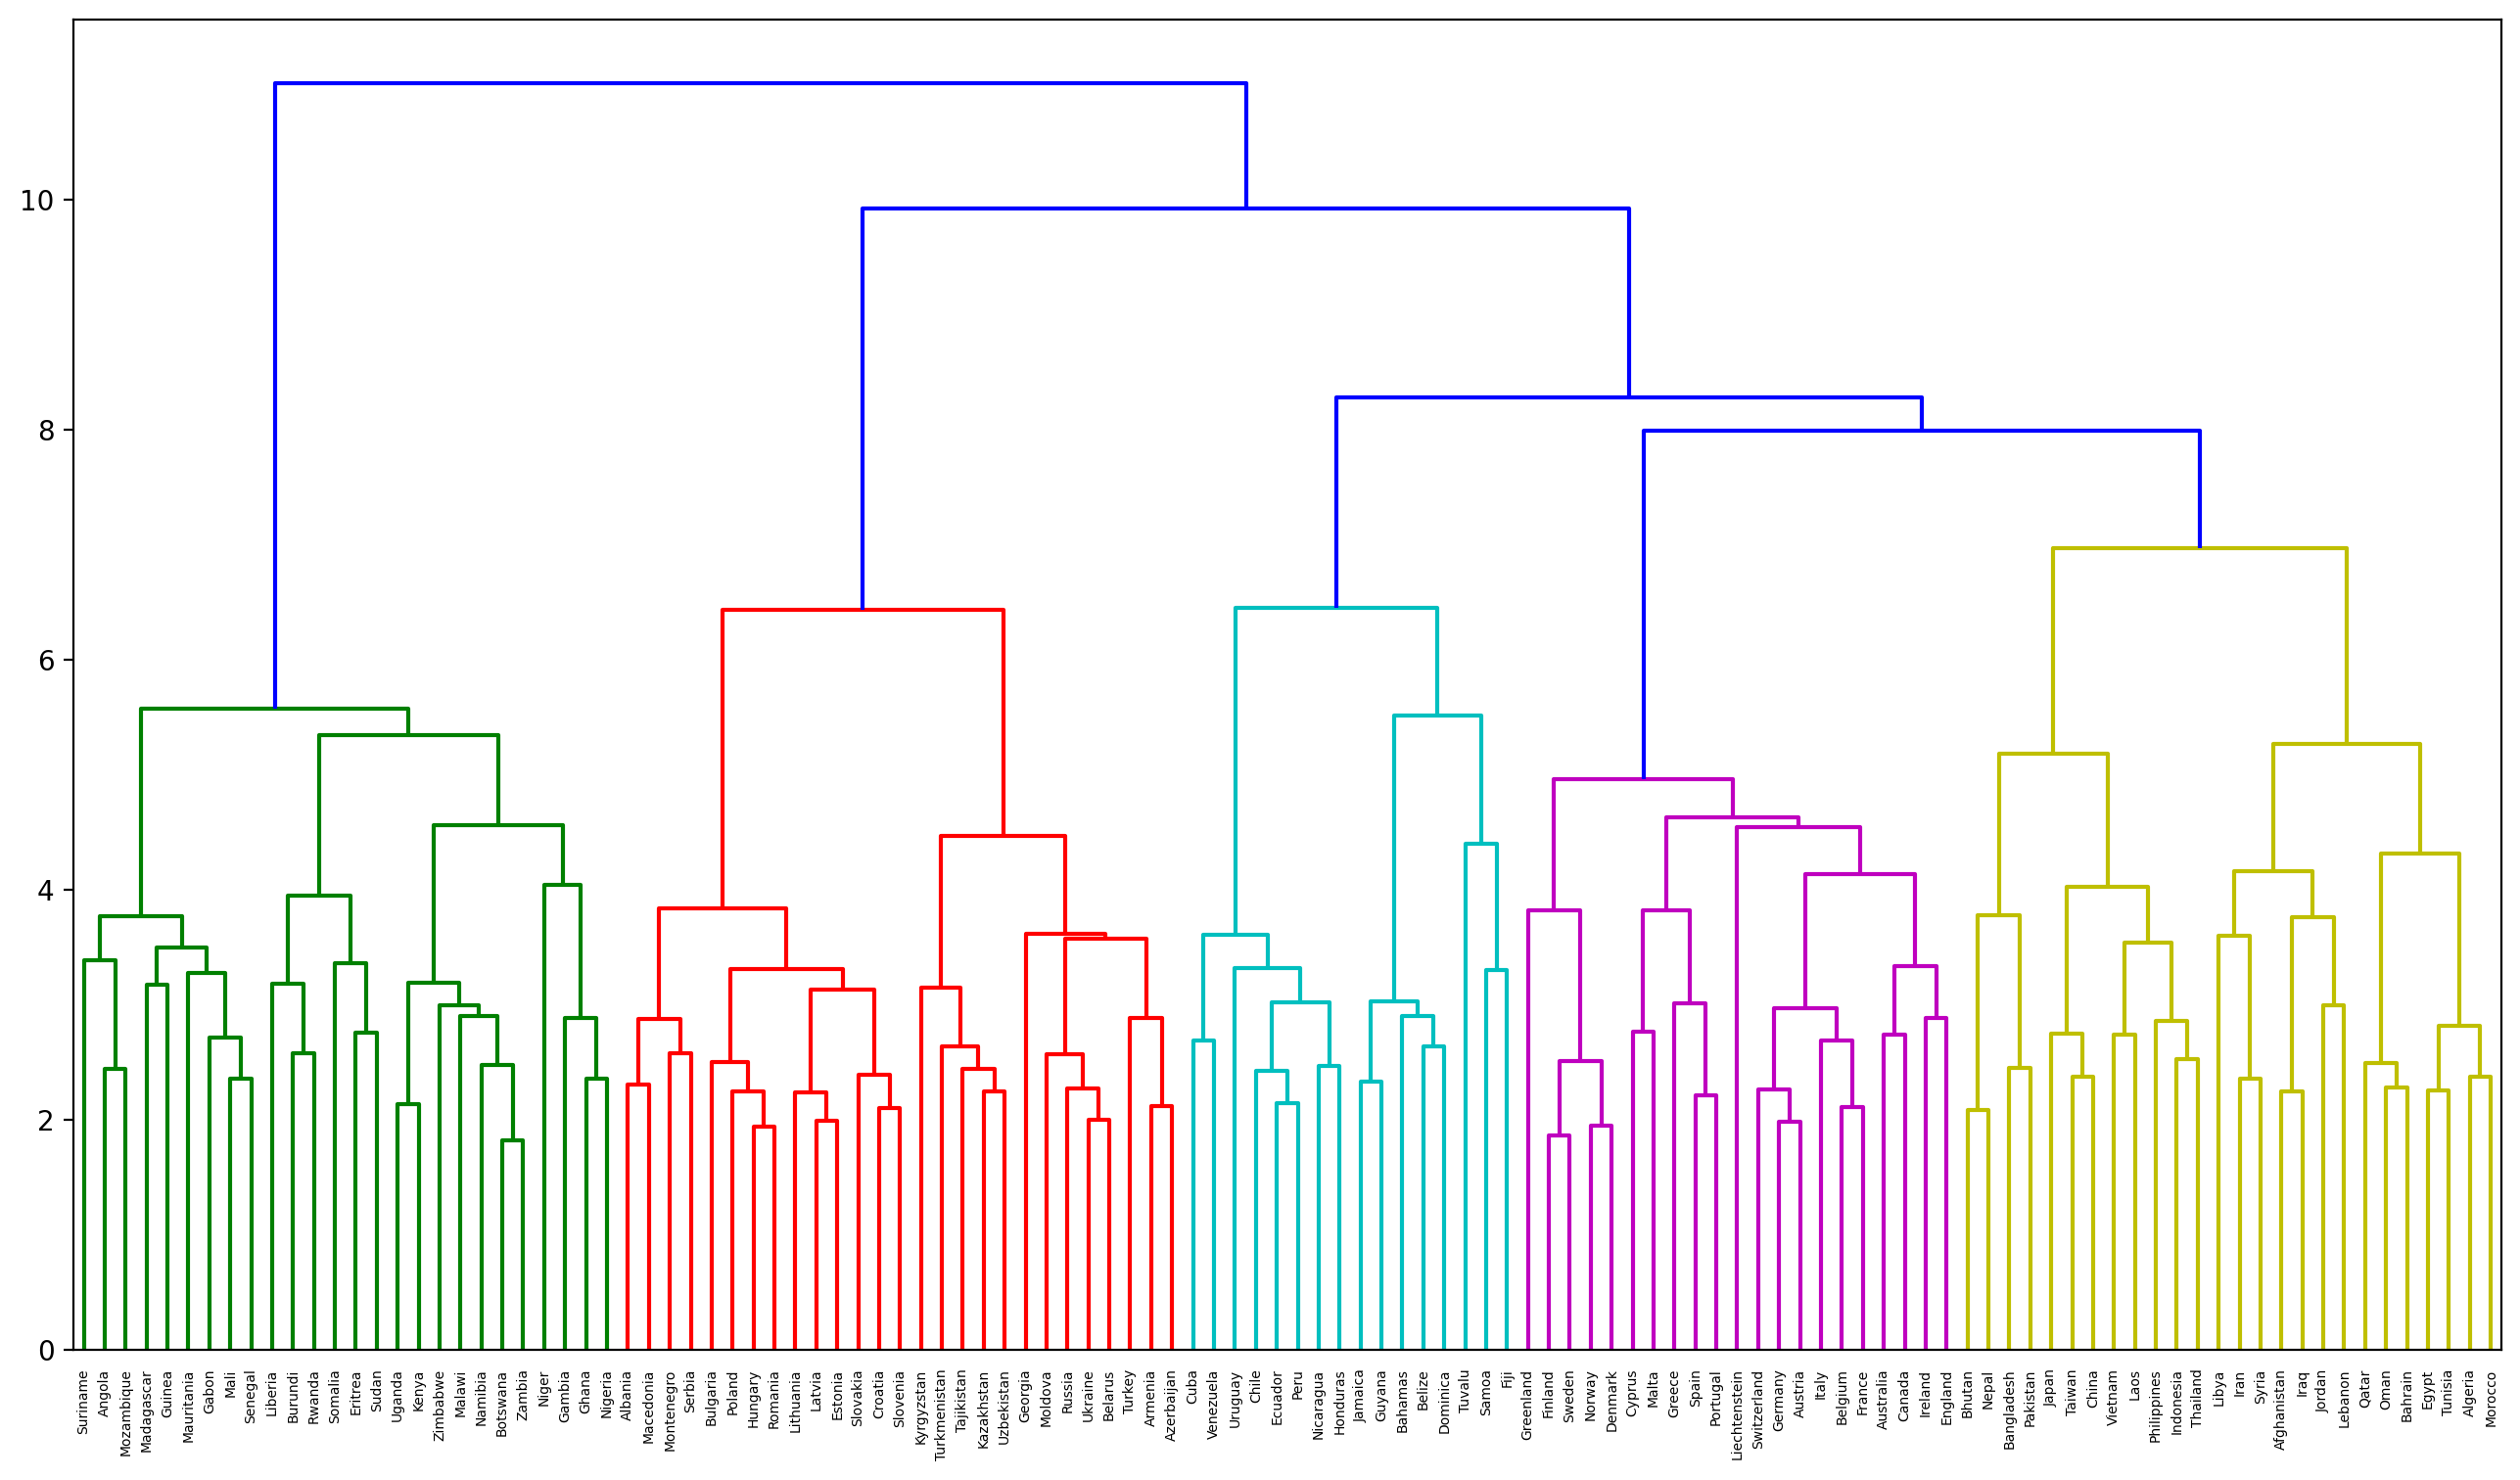

In [0]:
linkage_result = linkage(countries_vec, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=countries)
plt.show()

## 問題69

http://inaz2.hatenablog.com/entry/2017/01/24/211331
を参考にしました

In [0]:
from sklearn.manifold import TSNE

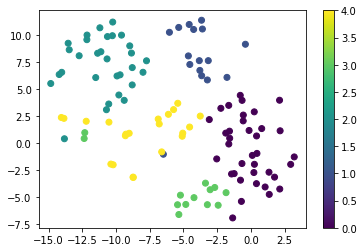

In [0]:
tsne = TSNE(n_components=2, random_state=0).fit_transform(countries_vec)
plt.scatter(tsne[:, 0], tsne[:, 1], c=km.labels_)
plt.colorbar()